# Data Analysis

#### By: Tu My DOAN & Sali Dauda MOHAMMED

### Libraries

In [15]:
import pandas as pd
import re, nltk, math
import numpy as np
import matplotlib.pyplot as plt
from sklearn.manifold import TSNE
from nltk.corpus import stopwords
from nltk import FreqDist
from wordcloud import WordCloud, STOPWORDS, ImageColorGenerator

### Data Loading

In [4]:
train = pd.read_csv('news_datafile.csv')
train.head()

,id,file,label,content
0,1,1.xml,0,Showers continued throughout the week in\nthe ...
1,2,2.xml,0,Standard Oil Co and BP North America\nInc said...
2,3,3.xml,0,Texas Commerce Bancshares Inc's Texas\nCommerc...
3,4,4.xml,0,BankAmerica Corp is not under\npressure to act...
4,5,5.xml,0,The U.S. Agriculture Department\nreported the ...


In [5]:
train_new = train.dropna()

In [6]:
# Ref: [1]
special_characters = re.compile("[^A-Za-z0-9 ]")
tokenizer = nltk.data.load("tokenizers/punkt/english.pickle")
def convert_to_sentences(data, tokenizer):
    # First, converting each review into sentences
    # Use NLTK Tokenizer to split review into sentences (punkt tokenizer - english.pickle)
    data = data.lower().replace("<i>", "")
    data = data.replace("    ", " ")
    data = data.replace("\n", ". ")
    #data = data.replace(".", ". ")
    data = data.replace("reuter", "")
    #print(data)
    data = re.sub("  ", " ", data)
    all_sentences = tokenizer.tokenize(data.strip())
    # Second, converting each sentence into words
    sentences = []
    for words in all_sentences:
        s = re.sub(special_characters, "", words.lower())
        if (len(s)) > 0:
            sentences.append(s.split())
    # Finally, returning a list of sentences (containing words in each sentence)
    return sentences

In [7]:
sample = convert_to_sentences(train_new['content'][12],tokenizer)
for i in sample:
    print(i)

['oper', 'shr', 'loss', 'two', 'cts', 'vs', 'profit', 'seven', 'cts']
['oper', 'shr', 'profit', '442000', 'vs', 'profit', '2986000', 'revs', '2918', 'mln', 'vs', '1511', 'mln']
['avg', 'shrs', '517', 'mln', 'vs', '434', 'mln']
['six', 'mths']
['oper', 'shr', 'profit', 'nil', 'vs', 'profit', '12', 'cts']
['oper', 'net', 'profit', '3376000', 'vs', 'profit', '5086000', 'revs', '5693', 'mln', 'vs', '2985', 'mln']
['avg', 'shrs', '516', 'mln', 'vs', '411', 'mln']
['note', 'per', 'shr', 'calculated', 'after', 'payment', 'of', 'preferred']
['dividends', 'results', 'exclude', 'credits', 'of', '2227000', 'or', 'four', 'cts', 'and']
['4841000', 'or', 'nine', 'cts', 'for', '1986', 'qtr', 'and', 'six', 'mths', 'vs', '2285000', 'or']
['six', 'cts', 'and', '4104000', 'or', '11', 'cts', 'for', 'prior', 'periods', 'from']
['operating', 'loss', 'carryforwards']


### Item counts per category

As we can see from the figure below, our data is not balanced.

In [21]:
train_new['label'].value_counts()

0    3478
1     924
Name: label, dtype: int64

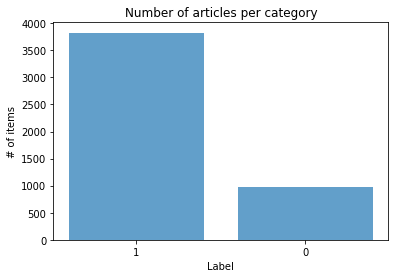

In [22]:
item_labels = {'0','1'}
y_range = np.arange(len(item_labels))
count_item = [3825, 975]
plt.bar(y_range, count_item, align="center", alpha = .7)
plt.xticks(y_range, item_labels)
plt.xlabel('Label')
plt.ylabel('# of items')
plt.title('Number of articles per category')
plt.show()

### WordCloud

In [12]:
STOPWORDS.update(["reuter"])
def create_word_cloud(df,label=1,save=False):
    data = " ".join(item for item in df.content[df.label==label])
    print ("Total words: {}".format(len(data)))
    word_cloud = WordCloud(max_words=300, background_color="white", collocations=False).generate(data)
    # Display figure
    plt.figure()
    plt.imshow(word_cloud, interpolation="bilinear")
    plt.axis("off")
    plt.show()
    # Save figure
    if save:
        word_cloud.to_file("wordcloud_"+str(label)+".png")

WordCloud for positive company earnings related articles:

Total words: 422567


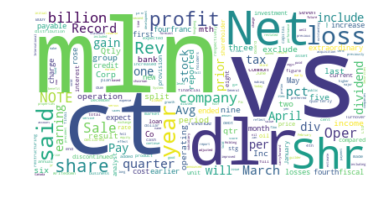

In [19]:
create_word_cloud(train_new,1,True)

WordCloud for negative company earnings related articles:

Total words: 3188216


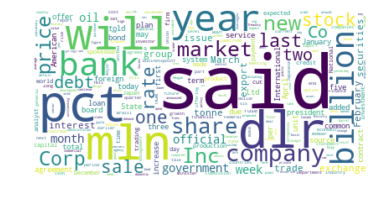

In [24]:
create_word_cloud(train_new,0,True)

### Word Frequency

In [9]:
special_characters = re.compile("[^A-Za-z0-9 ]")
tokenizer = nltk.data.load("tokenizers/punkt/english.pickle")
def convert_to_sentences(data, tokenizer):
    # First, converting each review into sentences
    # Use NLTK Tokenizer to split review into sentences (punkt tokenizer - english.pickle)
    data = data.lower().replace("<i>", "")
    data = data.replace("    ", " ")
    data = data.replace("\n", ". ")
    #data = data.replace(".", ". ")
    data = data.replace("reuter", "")
    #print(data)
    data = re.sub("  ", " ", data)
    all_sentences = tokenizer.tokenize(data.strip())
    #print(all_sentences)
    # Second, converting each sentence into words
    sentences = []
    for words in all_sentences:
        s = re.sub(special_characters, "", words.lower())
        if (len(s)) > 0:
            sentences.append(s)
    # Finally, returning a list of sentences (containing words in each sentence)
    return sentences

[('vs', 3189), ('mln', 2715), ('cts', 1963), ('dlrs', 1604), ('net', 1220), ('loss', 1092), ('said', 880), ('shr', 862), ('profit', 749), ('year', 727), ('revs', 545), ('share', 516), ('1986', 510), ('billion', 408), ('oper', 360), ('company', 345), ('note', 321), ('sales', 307), ('quarter', 292), ('march', 292)]


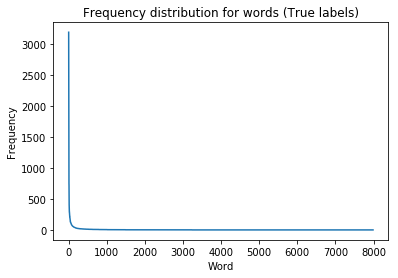

In [16]:
# Ref [1]
def freq_dist(label, title, most_common):
    sentences = []
    stop_words = stopwords.words('english')
    for content in train_new.content[train_new.label==label]:
        sentences += convert_to_sentences(content, tokenizer)
    all_tokens = ' '.join(sentences).split()
    filter_sen = []
    for word in all_tokens: 
        if word not in STOPWORDS: 
            filter_sen.append(word) 
    frq_dist = FreqDist(filter_sen)
    print(frq_dist.most_common(most_common))
    freq_val = [x[1] for x in frq_dist.most_common()]
    plt.plot(freq_val)
    plt.xlabel("Word")
    plt.ylabel("Frequency")
    plt.title(title)
    plt.show()
    
freq_dist(1, "Frequency distribution for words (True labels)", 20)  

[('said', 11155), ('pct', 3890), ('mln', 3592), ('dlrs', 3484), ('will', 3118), ('billion', 1889), ('us', 1706), ('year', 1702), ('company', 1576), ('inc', 1482), ('new', 1361), ('bank', 1307), ('last', 1238), ('corp', 1221), ('market', 1127), ('one', 982), ('shares', 967), ('stock', 959), ('debt', 859), ('two', 854)]


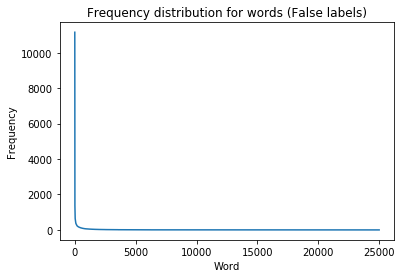

In [18]:
freq_dist(0, "Frequency distribution for words (False labels)", 20) 

# References

1. Brendan Martin Nikos Koufos, Sentiment Analysis on Reddit News Headlines with Python’s Natural Language Toolkit (NLTK)- https://www.learndatasci.com/tutorials/sentiment-analysis-reddit-headlines-pythons-nltk/